# <b> <p align="center"> <span style="color:	mediumspringgreen "> PyTorch Computer Vision <span> </p> </b>

## 0. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. | 
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. | 
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  | 
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.



In [40]:
# Import PyTorch

import torch
from torch import nn 

# import trochvision

import torchvision 

from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualaization

import matplotlib.pyplot as plt

# Check version

print(torch.__version__)
print(torchvision.__version__)

1.8.1+cu101
0.9.1+cu101


## 1. Getting a dataset

The dataset will'be using is FashionMNIST : https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST


In [41]:
# Setup traning data 

from torchvision import datasets

train_data = datasets.FashionMNIST(

    root='data', # where to download data to ?
    train=True, # do we want the training dataset ?
    download=True,
    transform=ToTensor(),
    target_transform=None


)

test_data = datasets.FashionMNIST(

    root='data', # where to download data to ?
    train=False, # do we want the training dataset ?
    download=True,
    transform=ToTensor(),
    target_transform=None

)

In [42]:
image,label=train_data[0]

image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [43]:
image.shape

torch.Size([1, 28, 28])

In [44]:
class_name=train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [45]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [46]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## 1.1 Check input and output shape of data

In [47]:
#Check the shape of our image
print(f"image shape : {image.shape} -> [color_channel,height,weight]")
print(f"image label: {class_name[label]}")

image shape : torch.Size([1, 28, 28]) -> [color_channel,height,weight]
image label: Ankle boot


## 1.2 Visualize our data

Text(0.5, 1.0, 'Ankle boot')

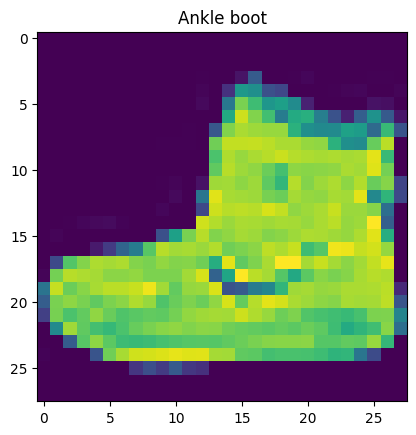

In [48]:
plt.imshow(image.squeeze())
plt.title(class_name[label])

Text(0.5, 1.0, '9')

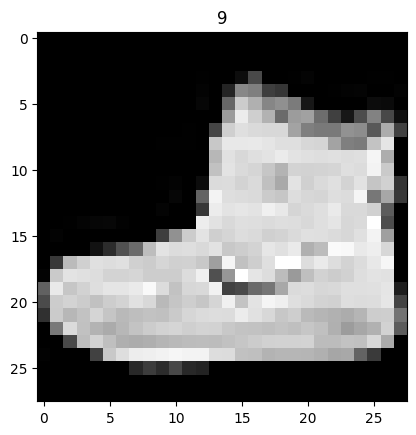

In [49]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(label)

TypeError: 'bool' object is not callable

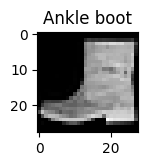

In [50]:
#plot more images 
torch.manual_seed(42)
fig =plt.figure(figsize=(12,6))
rows,cols=4,4
for i in range(1,rows*cols + 1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    img,label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap='gray')
    plt.title(class_name[label])
    plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines ? Or do you think we'll need non-linearity 

In [ ]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader 

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into python iterable.

More specifically, we want to turn our data into batches (or mini batches).

Why would we do this ?

1. It is more computationally efficient, as in, your computing hardware may not be able to look(store in memory) at 6000 images in one hit. So we break it down to 32 images at a time (batch size of 32).

2. It gives our neural network more chances to update its gradient per epoch.


In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter

BATCH_SIZE = 32 


# Turn dataset into iterable (batches)

train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader= DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

train_dataloader,test_dataloader



(<torch.utils.data.dataloader.DataLoader at 0x2a8c1550850>,
 <torch.utils.data.dataloader.DataLoader at 0x2a8c1550820>)

In [ ]:
# Let's check out what we've created

print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader :{len(train_dataloader)} batches of { BATCH_SIZE}.....")
print(f"Length of test_dataloader: {len(test_dataloader)} bateches of {BATCH_SIZE}.... ")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x000002A8C1550850>, <torch.utils.data.dataloader.DataLoader object at 0x000002A8C1550820>)
Length of train_dataloader :1875 batches of 32.....
Length of test_dataloader: 313 bateches of 32.... 


In [ ]:
# Check what's inside the train_dataloader 
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label 3, label size: torch.Size([])


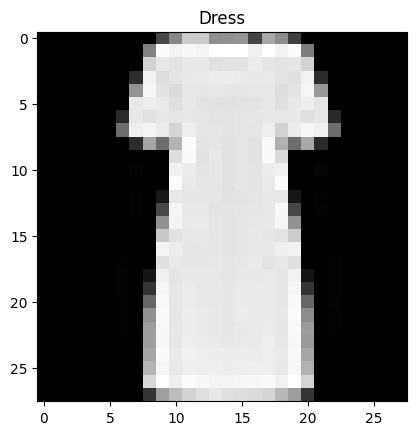

In [ ]:
# Show a random batch

RANDOM_SEED=42
torch.manual_seed(RANDOM_SEED)

random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_name[label])
plt.axis=False
print(f"Image size: {img.shape}")
print(f"Label {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model 

When starting to build a series of machine learning modelling experiments, it's best practices to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsquent models/experiments. 

In other words: start simply and add complexity when necessary

In [ ]:
# Create a flatten layer

flatten_model=nn.Flatten()

# Get a single sample

x=train_features_batch[0]
output=flatten_model(x)

# print out what happened

print(f"Shape before flattening: {x.shape} -> [color_channel, height, width]")
print(f"shape after flattening: {output.shape}")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channel, height, width]
shape after flattening: torch.Size([1, 784])


In [ ]:
output.squeeze()


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape:int,
                 output_shape:int,
                 hidden_unit):
        super().__init__()

        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_unit),
            nn.Linear(in_features=hidden_unit,
                      out_features=output_shape)
            
        )

    def forward(self,x):
        return self.layer_stack(x)

In [ ]:
# Device agnostics code 

device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [ ]:
# Setup model with input parameters

model_0=FashionMNISTModelV0(input_shape=784,
                            hidden_unit=10,
                            output_shape=len(class_name) ) #.to(device)

In [ ]:
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
model_0.parameters()

<generator object Module.parameters at 0x000002A8C139E430>

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0296, -0.0084,  0.0328,  ...,  0.0093,  0.0135, -0.0188],
                      [-0.0354,  0.0187,  0.0085,  ..., -0.0001,  0.0115, -0.0008],
                      [ 0.0017,  0.0045,  0.0133,  ..., -0.0188,  0.0059,  0.0100],
                      ...,
                      [ 0.0273, -0.0344,  0.0127,  ...,  0.0283, -0.0011, -0.0230],
                      [ 0.0257,  0.0291,  0.0243,  ..., -0.0087,  0.0001,  0.0176],
                      [-0.0147,  0.0053, -0.0194,  ..., -0.0221,  0.0205, -0.0093]])),
             ('layer_stack.1.bias',
              tensor([ 0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,
                       0.0163,  0.0069])),
             ('layer_stack.2.weight',
              tensor([[-0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,  0.2019,
                        0.2847, -0.1495],
                      [ 0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.

In [ ]:
dummy_x=torch.rand(size=[1,1,28,28]
                    )#.to(device)

model_0(dummy_x)

tensor([[ 0.4283,  0.1136, -0.3903, -0.0246, -0.0698,  0.2508,  0.4007, -0.4172,
         -0.0264, -0.2463]], grad_fn=<AddmmBackward>)

## 3.1 Setup loss , optimizer and evaluation metrics


* Loss function - since we are working with multi-class data , our loss function will be `nn.CrossEntropyLoss`
* Optimizer - our optimizer `torch.optim.SGD()` (Stochatic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metrics
 

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo

if Path("helper_functions.py").is_file():

    print("helper function.py already exists. skipping download...")
else:
    print("Downloading helper function.py / started 1/2/3 ....")
    request=requests.get("https://raw.githubusercontent.com/ShafaetUllah032/DL_with_PyTorch/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)



helper function.py already exists. skipping download...


In [ ]:
# Import accuracy metrics

from helper_functions import accuracy_fn

# Setup loss function and optimizer

loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_0.parameters(),
                        lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learing is very expermental.

Two of the main things you'll often want to track are:

1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     device: torch.device=None):
    
    """Print difference between start and end time."""

    total_time=end-start
    print(f"Train time on {device}: {total_time: .3f} seconds")
    return total_time

In [ ]:
start_time = timer()
# some code...
end_time=timer()
print_train_time(start=start_time,
                  end=end_time,
                  device="cpu")

Train time on cpu:  0.000 seconds


2.4399999915658555e-05

### 3.3 Creating a traing loop and training a model on batches of data

1. Loop through epoch
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening 
5. Time it all(for fun)



In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.no_grad():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59457 | Test loss: 0.55793, Test acc: 79.92%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.48067 | Test loss: 0.49500, Test acc: 82.40%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45434 | Test loss: 0.50101, Test acc: 82.47%

Train time on cpu:  14.705 seconds


In [ ]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.0295, -0.0084,  0.0303,  ...,  0.0329,  0.0278, -0.0203],
        [-0.0354,  0.0190,  0.0067,  ...,  0.0289,  0.0160, -0.0003],
        [ 0.0014,  0.0050,  0.0150,  ...,  0.0233,  0.0327,  0.0145],
        ...,
        [ 0.0272, -0.0349,  0.0093,  ..., -0.0418, -0.0290, -0.0282],
        [ 0.0255,  0.0288,  0.0217,  ..., -0.0784, -0.0412,  0.0100],
        [-0.0147,  0.0059, -0.0139,  ...,  0.0139,  0.0334, -0.0047]],
       requires_grad=True)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
str(next(model_0.parameters()).device)

'cpu'

## 4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.dataloader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    
    """ Returns a dictionary containing the result of model pedicting on  data_loader"""

    loss, acc = 0, 0
    model.eval()
    with torch.no_grad():

        for X,y in tqdm(data_loader):

            test_pred = model(X)

            eval_loss=loss_fn(test_pred,
                              y)
            
            loss += eval_loss
            acc += accuracy_fn(y_pred=test_pred.argmax(dim=1),
                               y_true=y)
            
        
        # Scale the loss and acc to find the average loss / acc per batch

        loss /=len(data_loader)

        acc /=len(data_loader)

    
    return {"model name " : model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc":acc}



# Calculate the model 0 result in test dataset 

model_0_result=eval_model(model=model_0,
                    data_loader=test_dataloader,
                    loss_fn=loss_fn,
                    accuracy_fn=accuracy_fn)

model_0_result


  0%|          | 0/313 [00:00<?, ?it/s]

{'model name ': 'FashionMNISTModelV0',
 'model_loss': 0.5020774006843567,
 'model_acc': 82.43809904153355}

## 5. Setup device agnostics-code (for using a GPU if there is one )


In [ ]:
import torch
device="cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

## 6. Model 1 : Building a better model with non-linearity

In [ ]:
# Create a model with non-linear and linear data 

class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_layer:int,
                 hidden_unit:int,
                 output_layer:int):
        super().__init__()
        
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_layer,
                      out_features=hidden_unit),
            nn.ReLU(),
            nn.Linear(in_features=hidden_unit,
                      out_features=output_layer),
            nn.ReLU()
        )
    def forward(self,x):

        return self.layer_stack(x)


# Create an instance of model_1
model_1=FashionMNISTModelV1(input_layer=28*28,
                            hidden_unit=10,
                            output_layer=len(class_name)).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

## 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

## 6.2 Functionizing training and evaluation/testing loops


Let's create a function for:

* training loop - `train_step()`

* testing loop - `test_step()`

In [55]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)

    model.train()
    
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.no_grad(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")